In [2]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import chain, simpleRFM, seqRFM, eulerN, eulerSame
import torch
from torch import nn
import copy
# warnings.filterwarnings('ignore')

save_folder = '../data/comparsions1'
def stitch_data(X):
    return ((X.T).reshape(-1, B*D)).T

def pair_sort(X, Y):
    return [x for _,x in sorted(zip(Y,X), key = lambda pair: pair[0])][::-1]

L0, L1 = 0.4, 3.5
D, D_r, B = 3, 256, 4
beta, N = 5e-9, 20000
m, n_repeats = 500, 500
batch_size, save_best = 100, True
error_threshold, dt, max_LE = 0.05, 0.02, 0.91
tau_f_kwargs = {'error_threshold' : error_threshold, 'dt': dt, 'Lyapunov_time': 1/max_LE}

Uo1 = torch.tensor(np.load('../data/L63-trajectories/train1.npy'))
UoB = torch.tensor(np.load(f'../data/L63-trajectories/train{B}.npy'))
SUoB = stitch_data(UoB)
Vo = torch.tensor(np.load('../data/L63-trajectories/test.npy'))
VoB = torch.tensor(np.load(f'../data/L63-trajectories/test{B}.npy'))

**Run Batch Experiments**

In [7]:
#Create one layer SimpleRFM with $D_r=256\times 4=1024$#

name = 'simple_rfm'
simple_rfm = simpleRFM.BatchDeepRF(Uo1, Vo, D_r*B, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# simple_rfm.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {simple_rfm.drf.name} is {simple_rfm.drf.count_params()}')

#Create multilayer SimpleRFM with $D_r=256$#

name = 'simple_rfm_concat'
simple_rfm_concat = simpleRFM.BatchDeepRF(UoB, Vo, D_r, B, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
# simple_rfm_concat.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {simple_rfm_concat.drf.name} is {simple_rfm_concat.drf.count_params()}')

#Create one layer SeqRFM with $D_r=448$#

name = 'seq_rfm'
D_r_ = int(np.ceil(D_r*((2*D+1)/(D+(D+1.)/B))))
seq_rfm = seqRFM.BatchDeepRF(UoB, VoB, D_r_, B, L0, L1, SUoB, beta, name, f'{save_folder}/{name}')
# seq_rfm.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {seq_rfm.drf.name} is {seq_rfm.drf.count_params()}')

#Create multilayer EulerSame with $D_r=256$#

name = 'euler_same'
euler_same = eulerSame.BatchDeepRF(UoB, Vo, D_r, B, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
# euler_same.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {euler_same.drf.name} is {euler_same.drf.count_params()}')

#Create multilayer Euler with $D_r=256$#

name = 'euler'
euler = eulerN.BatchDeepRF(UoB, Vo, D_r, B, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
print(f'Number of paramters in {euler.drf.name} is {euler.drf.count_params()}')
# euler.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)

#Create multilayer SkipRFM with $D_r=256$#

name = 'skip_rfm'
skip_rfm = eulerN.BatchDeepRF(Uo1, Vo, D_r*B, 1, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
print(f'Number of paramters in {skip_rfm.drf.name} is {skip_rfm.drf.count_params()}')
# skip_rfm.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)

#Create one layer SkipRFM with $D_r=256$#
name = 'skip_rfm_unit'
skip_rfm_unit = eulerN.BatchDeepRF(UoB, VoB, D_r, 1, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
new_tau_f_kwargs = tau_f_kwargs.copy()
new_tau_f_kwargs['dt'] = dt/B
# skip_rfm_unit.run(N, n_repeats, batch_size, save_best, **new_tau_f_kwargs)
print(f'Number of paramters in {skip_rfm_unit.drf.name} is {skip_rfm_unit.drf.count_params()}')

#Create one layer SimpleRFM with $D_r=256$#
name = 'simple_rfm_unit'
simple_rfm_unit = simpleRFM.BatchDeepRF(UoB, VoB, D_r, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# simple_rfm_unit.run(N, n_repeats, batch_size, save_best, **new_tau_f_kwargs)
print(f'Number of paramters in {simple_rfm_unit.drf.name} is {simple_rfm_unit.drf.count_params()}')

#Create one layer SkipRFM with $D_r=256$#
name = 'skip_rfm_unit_1'
skip_rfm_unit_1 = eulerN.BatchDeepRF(Uo1, Vo, D_r, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# skip_rfm_unit_1.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {skip_rfm_unit_1.drf.name} is {skip_rfm_unit_1.drf.count_params()}')

#Create one layer SimpleRFM with $D_r=256$#
name = 'simple_rfm_unit_1'
simple_rfm_unit_1 = simpleRFM.BatchDeepRF(Uo1, Vo, D_r, 1, L0, L1, Uo1, beta, name, f'{save_folder}/{name}')
# simple_rfm_unit_1.run(N, n_repeats, batch_size, save_best, **tau_f_kwargs)
print(f'Number of paramters in {simple_rfm_unit_1.drf.name} is {simple_rfm_unit_1.drf.count_params()}')

#Create one layer SkipRFMFine with $D_r=256$#
name = 'skip_rfm_fine'
skip_rfm_fine = eulerN.BatchDeepRF(UoB, VoB, D_r*B, 1, L0, L1, UoB, beta, name, f'{save_folder}/{name}')
print(f'Number of paramters in {skip_rfm_fine.drf.name} is {skip_rfm_fine.drf.count_params()}')
skip_rfm_fine.run(N, n_repeats, batch_size, save_best, **new_tau_f_kwargs)

expr = [simple_rfm, simple_rfm_concat, seq_rfm, euler_same, euler, skip_rfm, skip_rfm_unit, simple_rfm_unit,\
        skip_rfm_unit_1, simple_rfm_unit_1, skip_rfm_fine]
input_dim = [D, D, B*D, D, D, D, D, D, D, D, D]
input_dt = [dt, dt/B, dt/B, dt/B, dt/B, dt, dt/B, dt/B, dt, dt, dt/B]
output_dt = [dt, dt, dt/B, dt, dt, dt, dt/B, dt/B, dt, dt, dt/B]
mean_tau = [batch.get_data()['tau_f_se'].mean() for batch in expr]
std_tau = [batch.get_data()['tau_f_se'].std() for batch in expr]
mean_vpt = [batch.get_data()['tau_f_nmse'].mean() for batch in expr]
std_vpt = [batch.get_data()['tau_f_nmse'].std() for batch in expr]

# sort data
expr = pair_sort(expr, mean_tau)
std_tau = pair_sort(std_tau, mean_tau)
mean_vpt = pair_sort(mean_vpt, mean_tau)
std_vpt = pair_sort(std_vpt, mean_tau)
input_dim = pair_sort(input_dim, mean_tau)
input_dt = pair_sort(input_dt, mean_tau)
output_dt = pair_sort(output_dt, mean_tau)
mean_tau = pair_sort(mean_tau, mean_tau) # has to be last list to be sorted

Number of paramters in simple_rfm is 7168
Number of paramters in simple_rfm_concat is 7168
Number of paramters in seq_rfm is 7168
Number of paramters in euler_same is 7168
Number of paramters in euler is 7168
Number of paramters in skip_rfm is 7168
Number of paramters in skip_rfm_unit is 1792
Number of paramters in simple_rfm_unit is 1792
Number of paramters in skip_rfm_unit_1 is 1792
Number of paramters in simple_rfm_unit_1 is 1792
Number of paramters in skip_rfm_fine is 7168
Running experiments for batch 0...
Time taken = 1.26E+02s
Running experiments for batch 1...
Time taken = 1.05E+02s
Running experiments for batch 2...
Time taken = 9.70E+01s
Running experiments for batch 3...
Time taken = 6.62E+01s
Running experiments for batch 4...
Time taken = 6.62E+01s
Saving the best and worst models ...
Time taken by learn is 0.1642 seconds
Time taken by learn is 0.1562 seconds
Time taken by run is 460.7566 seconds


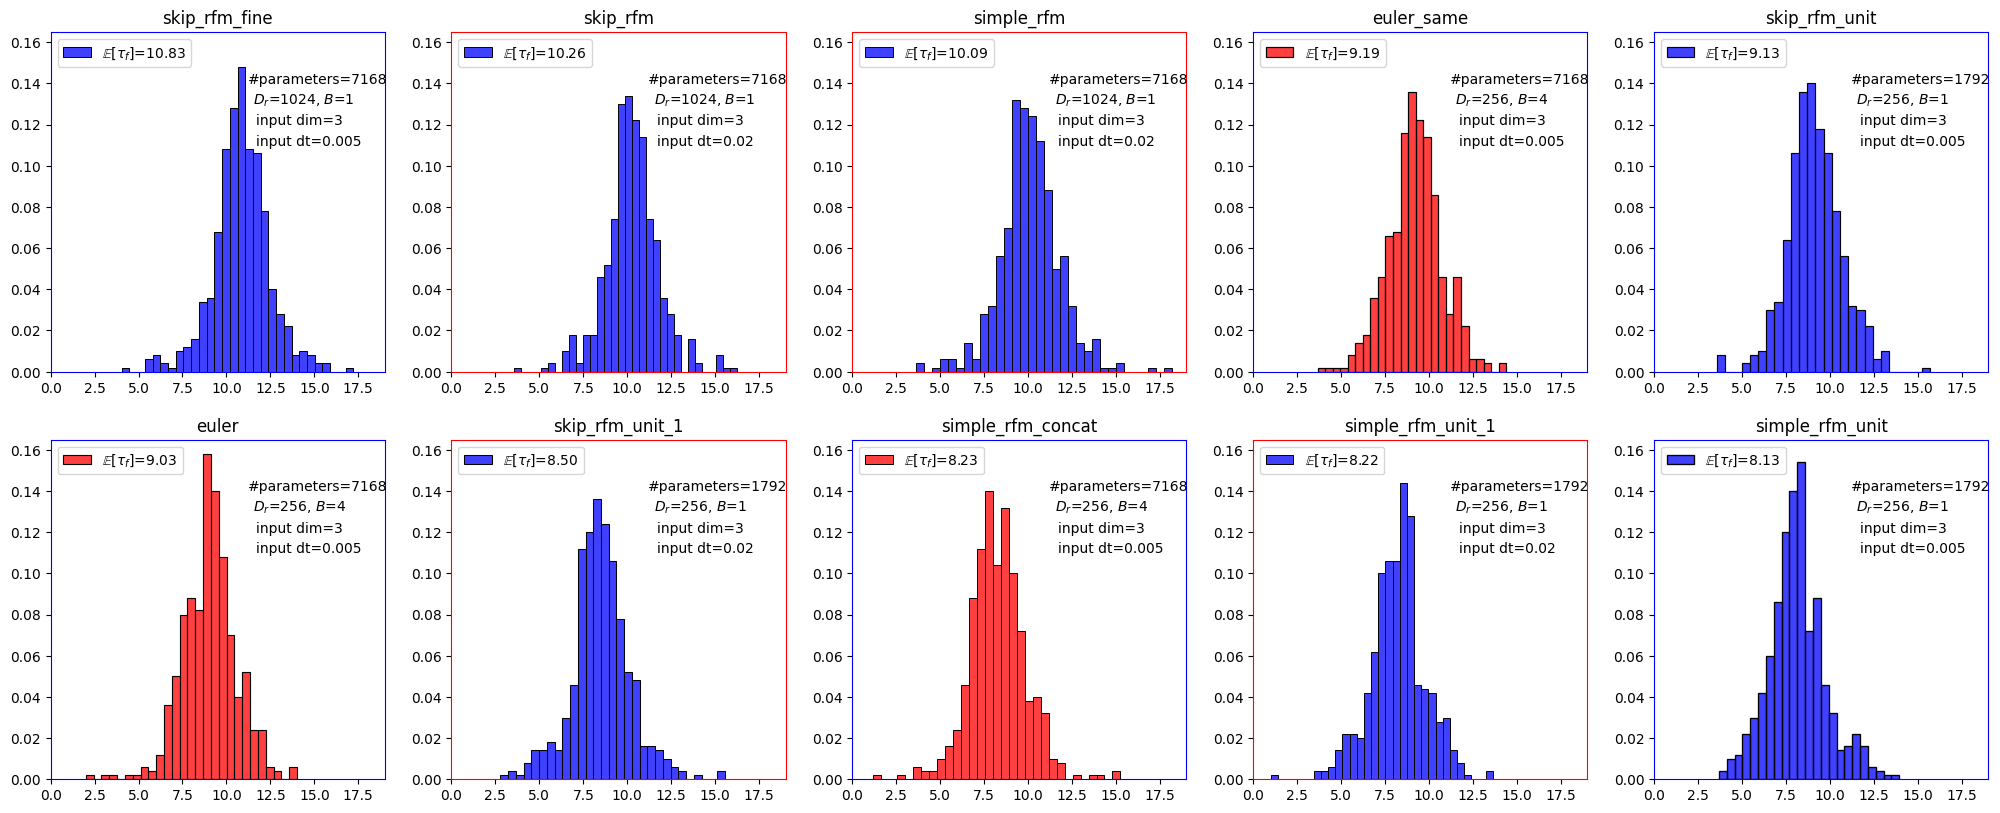

In [9]:
fig = plt.figure(figsize=(25, 15))
axs = [fig.add_subplot(3, 5, i+1) for i in range(10)]
for i, ax in enumerate(axs):
    tau = expr[i].get_data()['tau_f_se']
    color = 'red' if expr[i].drf.net.B > 1 else 'blue'
    sns.histplot(tau, ax=ax, stat='probability', label=r'$\mathbb{E}[\tau_f]$='+f'{tau.mean():.2f}', color=color)
    ax.set_title(f'{expr[i].drf.name}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(0, 19)
    ax.set_ylim(0, 0.165)
    ax.text(11.2, 0.14, f'#parameters={expr[i].drf.count_params()}')
    ax.text(11.5, 0.13, fr'$D_r$={expr[i].drf.net.D_r}, $B$={expr[i].drf.net.B}')
    ax.text(11.7, 0.12, fr'input dim={input_dim[i]}')
    ax.text(11.7, 0.11, fr'input dt={input_dt[i]}')
    # ax.text(11.7, 0.10, fr'dt={output_dt[i]}')
    ax.legend(loc='upper left')
    if input_dt[i] == dt:
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
    else:
        for spine in ax.spines.values():
            spine.set_edgecolor('blue')
plt.savefig(f'{save_folder}/tau_f.png', bbox_inches='tight', dpi=300)

Conclusions: Order of importance  beta > D_r > skip > B

**Best-Worst-Mixed Euler and SimpleRFMConcat**

In [5]:
euler_best = copy.deepcopy(euler.drf)
best = skip_rfm_unit.get_model('best').get_block_params(0)
euler_best.block_update(list(range(B)), [best[0]]*B, [best[1]]*B, [best[2]]*B)

euler_worst = copy.deepcopy(euler.drf)
worst = skip_rfm_unit.get_model('worst').get_block_params(0)
euler_worst.block_update(list(range(B)), [worst[0]]*B, [worst[1]]*B, [worst[2]]*B)

euler_mixed = copy.deepcopy(euler.drf)
euler_mixed.block_update(list(range(B)), [best[0], worst[0]]*int(B/2), [best[1], worst[1]]*int(B/2), [best[2], worst[2]]*int(B/2))

euler_best.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='best')
euler_worst.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='worst')
euler_mixed.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='mixed')

euler_tau_best = euler_best.read_tau_f('best').numpy()
euler_tau_worst = euler_worst.read_tau_f('worst').numpy()
euler_tau_mixed = euler_mixed.read_tau_f('mixed').numpy()


simple_rfm_concat_best = copy.deepcopy(simple_rfm_concat.drf)
best = simple_rfm_unit.get_model('best').get_block_params(0)
simple_rfm_concat_best.block_update(list(range(B)), [best[0]]*B, [best[1]]*B, [best[2]]*B)

simple_rfm_concat_worst = copy.deepcopy(simple_rfm_concat.drf)
worst = simple_rfm_unit.get_model('worst').get_block_params(0)
simple_rfm_concat_worst.block_update(list(range(B)), [worst[0]]*B, [worst[1]]*B, [worst[2]]*B)

simple_rfm_concat_mixed = copy.deepcopy(simple_rfm_concat.drf)
simple_rfm_concat_mixed.block_update(list(range(B)), [best[0], worst[0]]*int(B/2), [best[1], worst[1]]*int(B/2), [best[2], worst[2]]*int(B/2))


simple_rfm_concat_best.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='best')
simple_rfm_concat_worst.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='worst')
simple_rfm_concat_mixed.compute_tau_f(Vo[:m], error_threshold, dt, 1./max_LE, name='mixed')

simple_rfm_concat_tau_best = simple_rfm_concat_best.read_tau_f('best').numpy()
simple_rfm_concat_tau_worst = simple_rfm_concat_worst.read_tau_f('worst').numpy()
simple_rfm_concat_tau_mixed = simple_rfm_concat_mixed.read_tau_f('mixed').numpy()

all_tau = [euler_tau_best, euler_tau_worst, euler_tau_mixed, \
           simple_rfm_concat_tau_best, simple_rfm_concat_tau_worst, simple_rfm_concat_tau_mixed]
names = ['euler_best', 'euler_worst', 'euler_mixed', 'simple_rfm_concat_best', 'simple_rfm_concat_worst', 'simple_rfm_concat_mixed']
mean_all_tau = [float(tau.mean()) for tau in all_tau]
all_tau = pair_sort(all_tau, mean_all_tau)
names = pair_sort(names, mean_all_tau)
mean_all_tau = pair_sort(mean_all_tau, mean_all_tau)

Time taken by compute_tau_f is 25.3967 seconds
Time taken by compute_tau_f is 25.5141 seconds
Time taken by compute_tau_f is 25.3327 seconds
Time taken by compute_tau_f is 23.8445 seconds
Time taken by compute_tau_f is 23.7611 seconds
Time taken by compute_tau_f is 23.8409 seconds


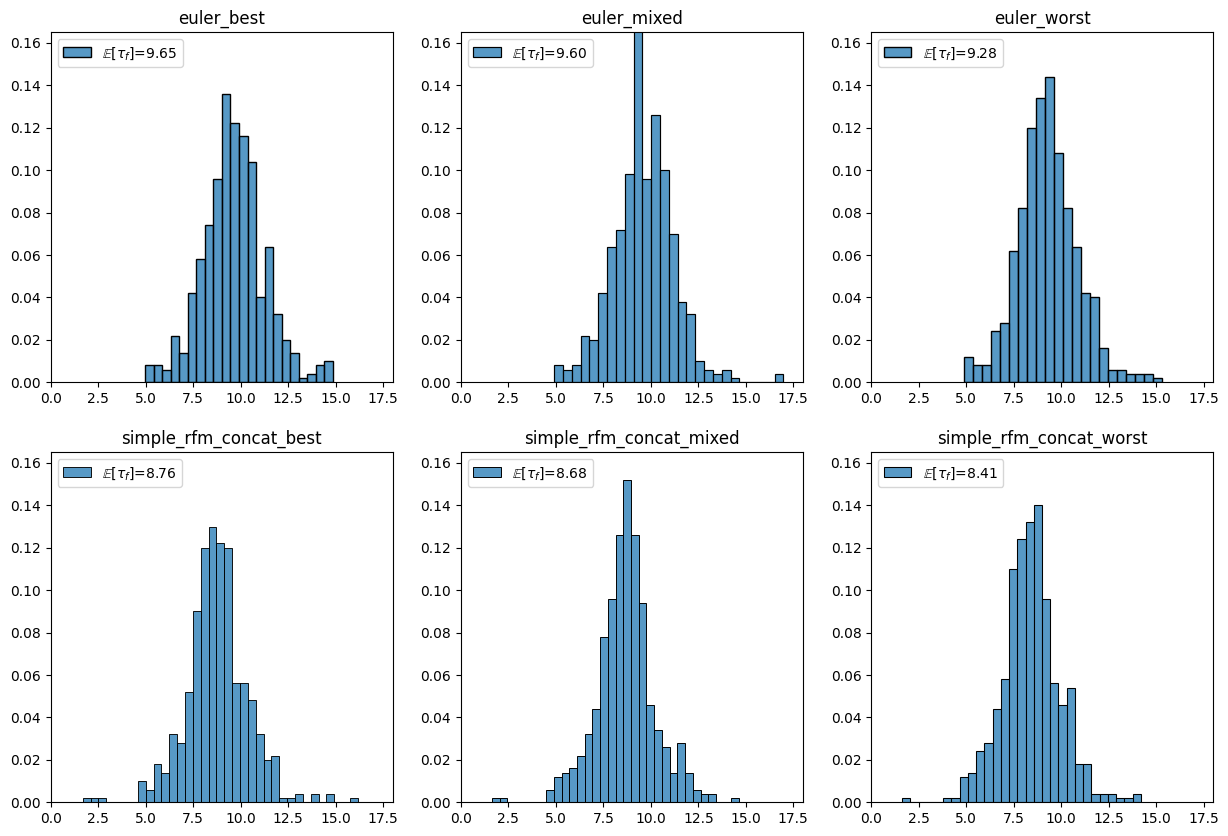

Time taken by learn is 0.0505 seconds
Time taken by learn is 0.0540 seconds
Time taken by learn is 0.0513 seconds
Time taken by learn is 0.0514 seconds
Time taken by learn is 0.0523 seconds
Time taken by learn is 0.0536 seconds
Time taken by learn is 0.0519 seconds
Time taken by learn is 0.0524 seconds
Time taken by learn is 0.0501 seconds
Time taken by learn is 0.0523 seconds
Time taken by learn is 0.0533 seconds
Time taken by learn is 0.0525 seconds
Time taken by learn is 0.0526 seconds
Time taken by learn is 0.0515 seconds
Time taken by learn is 0.0522 seconds
Time taken by learn is 0.0515 seconds
Time taken by learn is 0.0518 seconds
Time taken by learn is 0.0518 seconds
Time taken by learn is 0.0528 seconds
Time taken by learn is 0.0509 seconds
Time taken by learn is 0.0505 seconds
Time taken by learn is 0.0517 seconds
Time taken by learn is 0.0507 seconds
Time taken by learn is 0.0533 seconds
Time taken by learn is 0.0518 seconds
Time taken by learn is 0.0415 seconds
Time taken b

In [6]:
fig = plt.figure(figsize=(15, 10))
axs = [fig.add_subplot(2, 3, i+1) for i in range(6)]
for i, ax in enumerate(axs):
    tau = all_tau[i]
    sns.histplot(tau, ax=ax, stat='probability', label=r'$\mathbb{E}[\tau_f]$='+f'{tau.mean():.2f}')
    ax.set_title(f'{names[i]}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 0.165)
    ax.legend(loc='upper left')
  
plt.savefig(f'{save_folder}/best_worst_mixed.png', bbox_inches='tight', dpi=300)